In [77]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from astropy.table import Table
from desitarget.targetmask import desi_mask
import os 
%matplotlib inline

In [78]:
dens_science = Table.read('targets_ndensity.txt',  format='ascii')
dens_sky = Table.read('sky_ndensity.txt',  format='ascii')
dens_std = Table.read('std_ndensity.txt',  format='ascii')
counts = Table.read('tile_counts.txt', format='ascii')
counts['NUSED'] = counts['NSKY'] + counts['NSTD'] + counts['NSCIENCE'] + counts['NBADSKY']
print(len(counts), len(dens_science), len(dens_sky))

7054 7098 2645


9298
16262


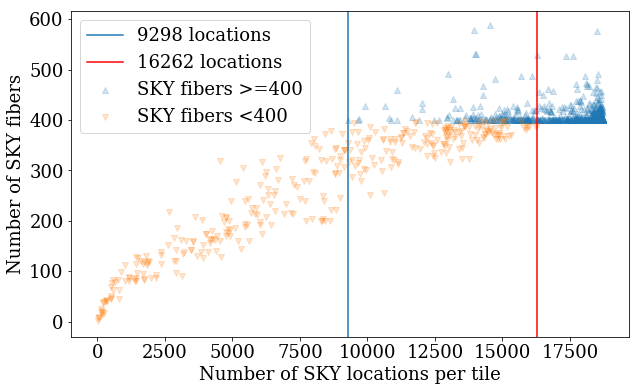

In [87]:
# Sky targets 
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)

dens_sky = Table.read('sky_ndensity.txt',  format='ascii')
counts = Table.read('tile_counts.txt', format='ascii')

ii = np.in1d(dens_sky['TILEID'], counts['TILEID'])
dens_sky = dens_sky[ii]
dens_sky.sort('TILEID')

ii = np.in1d(counts['TILEID'], dens_sky['TILEID'])
counts = counts[ii]
counts.sort('TILEID')

len(dens_sky), len(counts)
ii = counts['NSKY'] > 399
plt.scatter(dens_sky['N'][ii], counts['NSKY'][ii], alpha=0.2, marker='^', label='SKY fibers >=400')
plt.scatter(dens_sky['N'][~ii], counts['NSKY'][~ii], alpha=0.2, marker='v', label='SKY fibers <400')
plt.ylabel('Number of SKY fibers')
plt.xlabel('Number of SKY locations per tile')


jj = counts['NSKY']>399
min_dens = np.min(dens_sky['N'][jj])
print(min_dens)
jj = dens_sky['N']>min_dens
len(counts['NSKY'][jj]) == np.count_nonzero((counts['NSKY'][jj]>=400))
plt.axvline(x=min_dens, label='{} locations'.format(min_dens))

jj = counts['NSKY']<400
min_dens = np.max(dens_sky['N'][jj])
print(min_dens)
jj = dens_sky['N']>min_dens
len(counts['NSKY'][jj]) == np.count_nonzero((counts['NSKY'][jj]>=400))
plt.axvline(x=min_dens, label='{} locations'.format(min_dens), color='r')

plt.legend()
plt.savefig('doc/sky_density.pdf')

290
3310


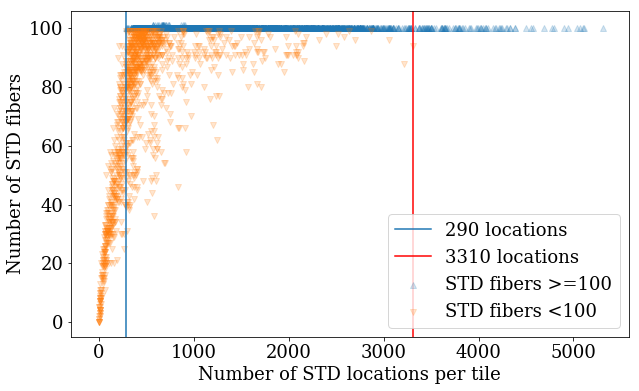

In [88]:
# Sky targets 
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)

dens_std = Table.read('std_ndensity.txt',  format='ascii')
counts = Table.read('tile_counts.txt', format='ascii')

ii = np.in1d(dens_std['TILEID'], counts['TILEID'])
dens_std = dens_std[ii]
dens_std.sort('TILEID')

ii = np.in1d(counts['TILEID'], dens_std['TILEID'])
counts = counts[ii]
counts.sort('TILEID')

len(dens_sky), len(counts)
ii = counts['NSTD'] > 99
plt.scatter(dens_std['N'][ii], counts['NSTD'][ii], alpha=0.2, marker='^', label='STD fibers >=100')
plt.scatter(dens_std['N'][~ii], counts['NSTD'][~ii], alpha=0.2, marker='v', label='STD fibers <100')
plt.ylabel('Number of STD fibers')
plt.xlabel('Number of STD locations per tile')


jj = counts['NSTD']>99
min_dens = np.min(dens_std['N'][jj])
print(min_dens)
jj = dens_std['N']>min_dens
len(counts['NSTD'][jj]) == np.count_nonzero((counts['NSTD'][jj]>=400))
plt.axvline(x=min_dens, label='{} locations'.format(min_dens))




jj = counts['NSTD']<100
min_dens = np.max(dens_std['N'][jj])
print(min_dens)
jj = dens_std['N']>min_dens
len(counts['NSTD'][jj]) == np.count_nonzero((counts['NSTD'][jj]>=400))
plt.axvline(x=min_dens, label='{} locations'.format(min_dens), color='r')
plt.legend()
plt.savefig('doc/std_density.pdf')

12933
18729


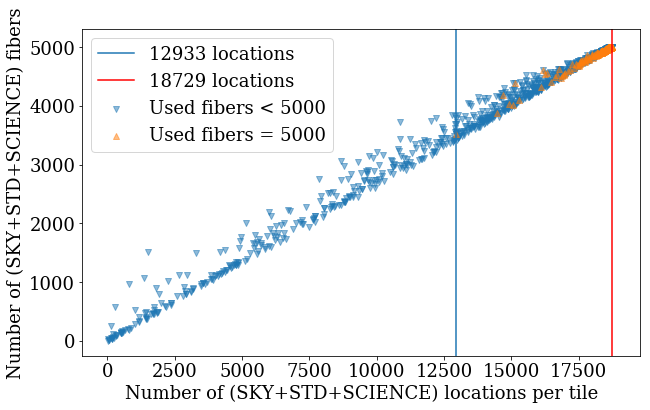

In [96]:
# all targets
plt.figure(figsize=(10,6))
plt.rc('text', usetex=False,)
plt.rc('font', family='serif', size=18)

dens_science = Table.read('targets_ndensity.txt',  format='ascii')
counts = Table.read('tile_counts.txt', format='ascii')

ii = np.in1d(dens_science['TILEID'], counts['TILEID'])
dens_science = dens_science[ii]
dens_science.sort('TILEID')

ii = np.in1d(counts['TILEID'], dens_science['TILEID'])
counts = counts[ii]
counts.sort('TILEID')

dens_sky = Table.read('sky_ndensity.txt',  format='ascii')
#counts = Table.read('tile_counts.txt', format='ascii')
ii = np.in1d(dens_sky['TILEID'], counts['TILEID'])
dens_sky = dens_sky[ii]
dens_sky.sort('TILEID')

ii = np.in1d(counts['TILEID'], dens_sky['TILEID'])
counts = counts[ii]
counts.sort('TILEID')


dens_std = Table.read('std_ndensity.txt',  format='ascii')
ii = np.in1d(dens_std['TILEID'], counts['TILEID'])
dens_std = dens_std[ii]
dens_std.sort('TILEID')

ii = np.in1d(counts['TILEID'], dens_std['TILEID'])
counts = counts[ii]
counts.sort('TILEID')



ii = np.in1d(dens_science['TILEID'], counts['TILEID'])
dens_science = dens_science[ii]
dens_science.sort('TILEID')

ii = np.in1d(counts['TILEID'], dens_science['TILEID'])
counts = counts[ii]
counts.sort('TILEID')


counts['NUSED'] = counts['NSKY'] + counts['NSTD'] + counts['NSCIENCE'] + counts['NBADSKY']

ii = counts['NUSED'] == 5000
dens_useful = dens_sky['N'] #+dens_science['N']
counts_useful = counts['NSCIENCE']+counts['NSTD']+counts['NSKY']

#dens_useful = dens_science['N']+dens_sky['N']+dens_std['N']
#counts_useful = counts['NUSED']

plt.scatter(dens_useful, counts_useful, alpha=0.5, marker='v', label='Used fibers < 5000')
plt.scatter(dens_useful[ii], counts_useful[ii], alpha=0.5, marker='^', label='Used fibers = 5000')


jj = counts['NUSED']==5000
min_dens = np.min(dens_useful[jj])
print(min_dens)
plt.axvline(x=min_dens, label='{} locations'.format(min_dens))


jj = counts['NUSED']<5000
min_dens = np.max(dens_useful[jj])
print(min_dens)
plt.axvline(x=min_dens, label='{} locations'.format(min_dens), color='red')

plt.ylabel('Number of (SKY+STD+SCIENCE) fibers')
plt.xlabel('Number of (SKY+STD+SCIENCE) locations per tile')

plt.legend()
plt.savefig('doc/all_density.pdf')

In [91]:
dens_sky['N'].max()

18734

In [220]:
ii = (dens_std['N']>300)&(dens_sky['N']>18500)&(dens_science['N']>30000)
counts['NUSED'][ii].min(), np.count_nonzero(counts['NUSED'][ii])

(4997, 1450)

In [212]:
dens_science['N'].max()

38590

(array([  24.,    9.,   19.,   12.,   11.,   14.,   13.,   14.,   19.,
          10.,    6.,   15.,   12.,   20.,   22.,   19.,   20.,   14.,
          22.,   22.,   26.,   41.,   38.,   48.,   54.,   63.,   72.,
          85.,  114.,  159.,  218.,  280.,  321.,  384.,  285.,  149.,
          75.,   30.,   15.,    3.]),
 array([  7.00000000e+00,   9.71575000e+02,   1.93615000e+03,
          2.90072500e+03,   3.86530000e+03,   4.82987500e+03,
          5.79445000e+03,   6.75902500e+03,   7.72360000e+03,
          8.68817500e+03,   9.65275000e+03,   1.06173250e+04,
          1.15819000e+04,   1.25464750e+04,   1.35110500e+04,
          1.44756250e+04,   1.54402000e+04,   1.64047750e+04,
          1.73693500e+04,   1.83339250e+04,   1.92985000e+04,
          2.02630750e+04,   2.12276500e+04,   2.21922250e+04,
          2.31568000e+04,   2.41213750e+04,   2.50859500e+04,
          2.60505250e+04,   2.70151000e+04,   2.79796750e+04,
          2.89442500e+04,   2.99088250e+04,   3.08734000e+

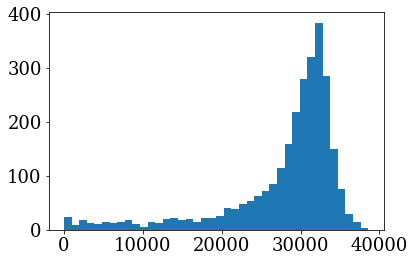

In [213]:
plt.hist(dens_science['N'], bins=40)

In [214]:
dens_science['N'].mean()

27901.573280518543

(array([   16.,    12.,     7.,    16.,     6.,     4.,    11.,     6.,
           10.,    10.,    13.,    10.,    10.,     9.,     7.,     5.,
           10.,    12.,    12.,    13.,    14.,    14.,     8.,    17.,
           10.,    11.,    17.,    28.,    23.,    31.,    29.,    42.,
           37.,    44.,    46.,    39.,    38.,    62.,    85.,  1983.]),
 array([  7.00000000e+00,   4.75175000e+02,   9.43350000e+02,
          1.41152500e+03,   1.87970000e+03,   2.34787500e+03,
          2.81605000e+03,   3.28422500e+03,   3.75240000e+03,
          4.22057500e+03,   4.68875000e+03,   5.15692500e+03,
          5.62510000e+03,   6.09327500e+03,   6.56145000e+03,
          7.02962500e+03,   7.49780000e+03,   7.96597500e+03,
          8.43415000e+03,   8.90232500e+03,   9.37050000e+03,
          9.83867500e+03,   1.03068500e+04,   1.07750250e+04,
          1.12432000e+04,   1.17113750e+04,   1.21795500e+04,
          1.26477250e+04,   1.31159000e+04,   1.35840750e+04,
          1.405225

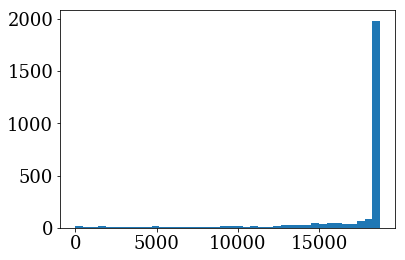

In [221]:
plt.hist(dens_sky['N'], bins=40)

In [223]:
dens_sky['N'].mean()

16916.454807346057